## Anscombe Dataset. A research.

### Francis John Anscombe

Francis John Anscombe (13 May 1918 – 17 October 2001)was an English statistician renowned for his works on randomisation, analysis of variance (Anscombre transform, used to stabilise Standard Deviation in Poisson distributions is named after him) and computer statistics.

### Anscombe dataset

This is a well-known data set, consisting in 4 different sets of (x,y) values.Each data-set has a series of x values and dependent y values. 

Interestingly, these four different data sets have essentially the same values for:

- mean of x
- variance of x
- mean of y
- variance of y
- correlation between x and y
- linear regression intercept and slope

As a first aproach, the data-set is displayed using DataFrames from pandas package.

In [154]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importing dataset from csv file using pandas
data = pd.read_csv("anscombe.csv")
print (data)


    x1  x2  x3  x4     y1    y2     y3     y4
0   10  10  10   8   8.04  9.14   7.46   6.58
1    8   8   8   8   6.95  8.14   6.77   5.76
2   13  13  13   8   7.58  8.74  12.74   7.71
3    9   9   9   8   8.81  8.77   7.11   8.84
4   11  11  11   8   8.33  9.26   7.81   8.47
5   14  14  14   8   9.96  8.10   8.84   7.04
6    6   6   6   8   7.24  6.13   6.08   5.25
7    4   4   4  19   4.26  3.10   5.39  12.50
8   12  12  12   8  10.84  9.13   8.15   5.56
9    7   7   7   8   4.82  7.26   6.42   7.91
10   5   5   5   8   5.68  4.74   5.73   6.89


### Obtaining summary statistics of the data set

Summary statistics show, matchong with the description, almost the same values for means and standard deviations in both x and y sets.

According to this information, we might be inclined to state that x and y distributions are both alike.


In [3]:
# Transforming dataset into DataFrame and describing its components
df = pd.DataFrame(data)
print (df.describe())

              x1         x2         x3         x4         y1         y2  \
count  11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean    9.000000   9.000000   9.000000   9.000000   7.500909   7.500909   
std     3.316625   3.316625   3.316625   3.316625   2.031568   2.031657   
min     4.000000   4.000000   4.000000   8.000000   4.260000   3.100000   
25%     6.500000   6.500000   6.500000   8.000000   6.315000   6.695000   
50%     9.000000   9.000000   9.000000   8.000000   7.580000   8.140000   
75%    11.500000  11.500000  11.500000   8.000000   8.570000   8.950000   
max    14.000000  14.000000  14.000000  19.000000  10.840000   9.260000   

              y3         y4  
count  11.000000  11.000000  
mean    7.500000   7.500909  
std     2.030424   2.030579  
min     5.390000   5.250000  
25%     6.250000   6.170000  
50%     7.110000   7.040000  
75%     7.980000   8.190000  
max    12.740000  12.500000  


The definition also specified that correlation between every (x,y) set is almost the same. Pearson correlation coeficients are calculated for every pair.

The result is, indeed, roughly the same for every pair. 

In [152]:
# df.corr(['x1'],['y1'])
corr1 = df.corr()['x1']['y1']
corr2 = df.corr()['x2']['y2']
corr3 = df.corr()['x3']['y3']
corr4 = df.corr()['x4']['y4']

sets=("(x1, y1)", "(x2, y2)", "(x3, y3)", "(x4, y4)")
corrs=(corr1, corr2, corr3, corr4)

"""
Trying to build (corrsets) using dict and zip:

corrsets=dict(zip(sets), (corrs))

dict({'one': 1, 'two': 2})
dict(one=1, two=2)
dict({'one': 1, 'two': 2})
dict(zip(('one', 'two'), (1, 2)))
dict([['two', 2], ['one', 1]])

"""

corrsets={
    "(x1, y1)":(corr1), "(x2, y2)":(corr2), "(x3, y3)":(corr3), "(x4, y4)":(corr4)
}

for sets, corrs in corrsets.items():
    print ("Set",(sets), "\nLinear correlation coeficient: ",(corrs),"\n")

Set (x1, y1) 
Linear correlation coeficient:  0.81642051634484 

Set (x2, y2) 
Linear correlation coeficient:  0.8162365060002428 

Set (x3, y3) 
Linear correlation coeficient:  0.8162867394895981 

Set (x4, y4) 
Linear correlation coeficient:  0.8165214368885028 



In [182]:
x= df.loc[:,'x1']
y= df.loc[:,'y1']

plt.plot(x.y)



AttributeError: 'Series' object has no attribute 'y'

In [ ]:
fig = plt.figure()
fig.add_subplot(111)

### Graphical Representation



In [177]:

# Plotting the four series of data in a scatter plot

df.plot.scatter((sets),grid=True, subplots=True)


df.plot.scatter('x1','y1',grid=True)
df.plot.scatter('x2','y2',grid=True)
df.plot.scatter('x3','y3',grid=True)
df.plot.scatter('x4','y4',grid=True)

plt.show()
# Importing seaborn for plotting
import seaborn as sns


TypeError: scatter() missing 1 required positional argument: 'y'

'\nax2.set_xlabel(\'sample\')\nax2.set_ylabel(\'cumulative sum\')\nax2.set_title("Normal distrubution")\nplt.tight_layout()\n'

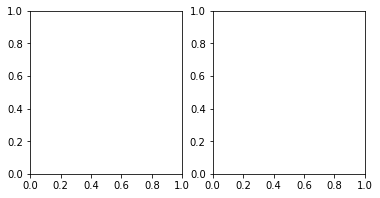

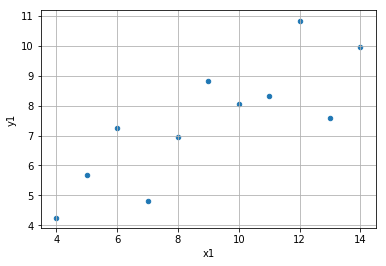

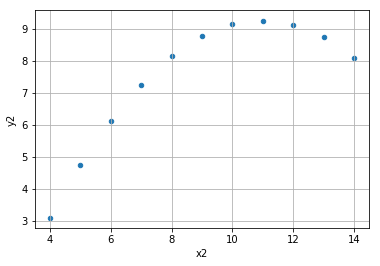

In [77]:
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(121)
#ax1.set_xlabel('some random numbers')
#ax1.set_ylabel('more random numbers')
#ax1.set_title("Random scatterplot")
df.plot.scatter('x1','y1',grid=True)
ax2 = fig.add_subplot(122)
df.plot.scatter('x2','y2',grid=True)
#plt.hist(np.random.normal(size=100), bins=15)
'''
ax2.set_xlabel('sample')
ax2.set_ylabel('cumulative sum')
ax2.set_title("Normal distrubution")
plt.tight_layout()
'''

In [101]:
list_of_lists = [ [1, 2, 3], [4, 5, 6], [7, 8, 9]]
for list in list_of_lists:
    #for x in list:
        print (x)

9
9
9
